In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

### Process CSV files into Dataframe

In [2]:
dat_2og = pd.read_csv("data/out2core.csv", header=0, usecols=range(1,6))

Need to add results from queries 7-9 for 2 cores

In [3]:
dat_2ogp2 = pd.read_csv("data/out_2core_part2.csv", header=0)

dat_2ohp2 = pd.read_csv("data/out_onehot_2core_part2.csv", header=0).drop("Unnamed: 0", axis=1)
dat_2ohp2["num_cores"] = 2
dat_2ohp2["time"] = dat_2ogp2.runtime

# need to remove the rows where executor-memory > 4
dat_2ohp2 = dat_2ohp2.loc[dat_2ohp2['executor-memory'] <= 4]
dat_2ohp2 = dat_2ohp2.loc[dat_2ohp2['driver-memory'] <= 4]

In [4]:
dat_2oh = pd.read_csv("data/out_onehot2core.csv", header=0).drop("Unnamed: 0", axis=1)
dat_2oh["num_cores"] = 2
dat_2oh["time"] = dat_2og.runtime

In [5]:
dat_2 = dat_2oh.merge(dat_2ohp2, how='outer')
dat_2 = dat_2.fillna(0)

Adding rows when 4 cores were used.

In [6]:
dat_4og = pd.read_csv("data/out4core.csv", header=0)
dat_4 = pd.read_csv("data/out_onehot4core.csv", header=0).drop("Unnamed: 0", axis=1)

dat_4["num_cores"] = 4
dat_4["time"] = dat_4og.runtime

**Need to remove one column from each categorical to make it not perfectly linear. Removing GC-Alg-G1C1 and keeping all query columns.**

In [7]:
include2 = [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14]
include4 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14]
temp_2 = dat_2.iloc[:,include2]
temp_4 = dat_4.iloc[:,include4]
all_df = pd.concat([temp_2, temp_4])
columns = ["driver-memory", "executor-memory", "num_cores", "q_01", "q_02", "q_03", "q_04", "q_05", "q_06", "q_07", "q_08", "q_09", "gc-alg-parallel", "time"]
all_df.columns = columns
all_df.head()

,driver-memory,executor-memory,num_cores,q_01,q_02,q_03,q_04,q_05,q_06,q_07,q_08,q_09,gc-alg-parallel,time
0,3,2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,34.645
1,2,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,40.037
2,2,4,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,32.401
3,4,4,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,40.747
4,3,4,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,34.123


### Visualization

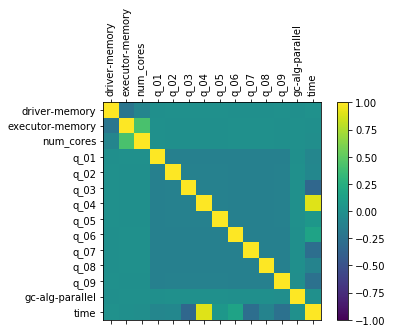

In [8]:
correlations = all_df.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_yticklabels(columns)
ax.set_xticklabels(columns)
plt.xticks(rotation=90)
plt.savefig("corr_all.jpg")
plt.show()

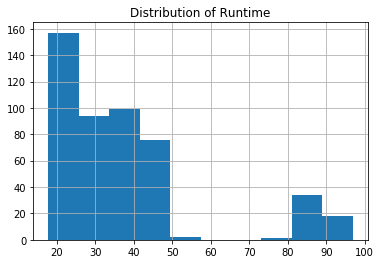

In [9]:
all_df.time.hist()
plt.title("Distribution of Runtime")
plt.savefig("time_hist_all.jpg")
plt.show()

In [10]:
all_df.loc[all_df.time > 70].head() # all query #4!!!

,driver-memory,executor-memory,num_cores,q_01,q_02,q_03,q_04,q_05,q_06,q_07,q_08,q_09,gc-alg-parallel,time
16,4,3,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,94.571
27,2,4,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,90.965
29,3,3,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,90.358
32,4,4,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,92.570
39,2,3,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,90.456


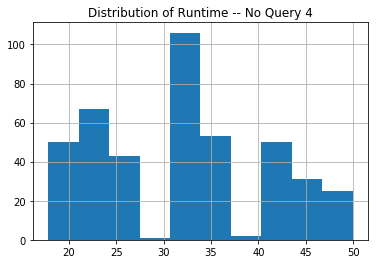

In [11]:
df_no4 = all_df.loc[all_df.q_04 == 0]
df_no4 = df_no4.drop("q_04", axis=1)

df_no4.time.hist()
plt.title("Distribution of Runtime -- No Query 4")
plt.savefig("time_hist_no4.jpg")
plt.show()

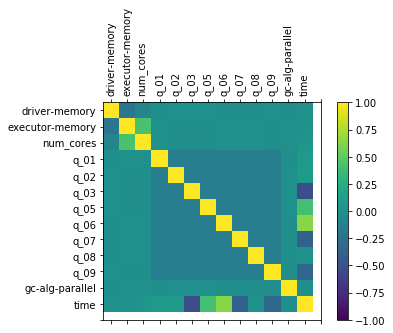

In [12]:
correlations = df_no4.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_yticklabels(df_no4.columns)
ax.set_xticklabels(df_no4.columns)
plt.xticks(rotation=90)
plt.savefig("corr_no4.jpg")
plt.show()

Decide to keep query 4 just so we can have more data. Throwing interpretation out the window (for now).

#### Split Train and Test

In [13]:
rs = np.random.RandomState(seed=1)
df = all_df
X = df.iloc[:,:-1]
y = df['time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=rs, ) # 80/20 split!

## Linear Regression

In [14]:
# fitting intercept = False because included all query columns!
reg = LinearRegression(fit_intercept=False).fit(X_train, y_train)
print(reg.score(X_train, y_train))
y_pred_reg = reg.predict(X_test)
mean_squared_error(y_test, y_pred_reg)

0.9903203171438915


3.6726905129961556

In [15]:
c = pd.DataFrame(reg.coef_)
c = c.T
c.columns = X_train.columns
c

,driver-memory,executor-memory,num_cores,q_01,q_02,q_03,q_04,q_05,q_06,q_07,q_08,q_09,gc-alg-parallel
0,0.279131,0.015952,-0.07942,33.042593,33.66528,19.367797,86.207029,40.631488,46.138783,22.612985,31.849557,23.523837,0.010464


_These numbers actually don't mean anything since we violated the Linear Regression assumptions! But will still include them for funsies_

## LASSO

In [16]:
lasso = Lasso(random_state=rs, alpha=0.1).fit(X_train, y_train)
print(lasso.score(X_train, y_train))
print(lasso.coef_)
print
y_pred_lasso = lasso.predict(X_test)
mean_squared_error(y_test, y_pred_lasso)

0.9882951682868825
[  0.06885554  -0.          -0.           0.           0.
 -12.67386232  52.37640067   6.74793478  12.38685043  -9.40593854
  -0.07339784  -8.46671642   0.        ]


4.118033893770906

## Random Forest

In [17]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
rf = RandomForestRegressor(random_state=rs)
rf.fit(X_train, y_train)

s = pd.DataFrame((rf.feature_importances_))
s = s.T
s.columns = X_train.columns

s

C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,driver-memory,executor-memory,num_cores,q_01,q_02,q_03,q_04,q_05,q_06,q_07,q_08,q_09,gc-alg-parallel
0,0.001039,0.000994,0.00689,0.002353,0.001994,0.020318,0.792049,0.046617,0.090907,0.016934,0.001974,0.017525,0.000406


In [18]:
y_pred_rf = rf.predict(X_test)
mean_squared_error(y_test, y_pred_rf)

1.1525327969072157

--------

# With Box-Cox Time (y)

See if we can transform Y to be more bell-shaped using Box-Cox.

[-0.80878603]


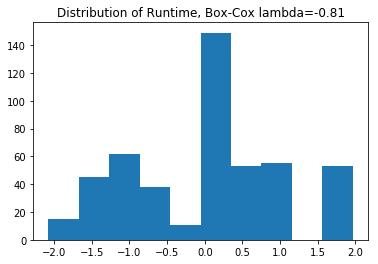

In [19]:
temp_y = all_df.time.values.reshape(len(all_df), 1)
# https://www.isixsigma.com/tools-templates/normality/making-data-normal-using-box-cox-power-transformation/
bc = preprocessing.PowerTransformer(method='box-cox', standardize=True) # NOTE! only works with sklearn 0.2+
bc_y = bc.fit_transform(temp_y)
print(bc.lambdas_)

plt.hist(bc_y)
plt.title("Distribution of Runtime, Box-Cox lambda=-0.81")
plt.savefig("time_dist_boxcox.jpg")
plt.show()

In [20]:
rs = np.random.RandomState(seed=1)
df = all_df
X = df.iloc[:,:-1]
y = bc_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=rs, ) # 80/20 split!

### Linear Regression

In [21]:
# fitting intercept = False because included all query columns!
reg = LinearRegression(fit_intercept=False).fit(X_train, y_train)
print(reg.score(X_train, y_train))
y_pred_reg = reg.predict(X_test)
mean_squared_error(y_test, y_pred_reg)

0.9876827811838255


0.009178836802854872

In [22]:
c = pd.DataFrame(reg.coef_)
c.columns = X_train.columns
c # coefficients of the linear regression model

,driver-memory,executor-memory,num_cores,q_01,q_02,q_03,q_04,q_05,q_06,q_07,q_08,q_09,gc-alg-parallel
0,0.020084,0.000388,0.064734,-0.182705,-0.133983,-1.888234,1.561607,0.317292,0.57859,-1.31328,-0.270393,-1.182916,0.004668


_Be careful when looking at these numbers! You have to think of them in terms of the Box-Cox values now_

### LASSO

In [23]:
l = pd.DataFrame(lasso.coef_)
l = l.T
l.columns = X_train.columns
l

,driver-memory,executor-memory,num_cores,q_01,q_02,q_03,q_04,q_05,q_06,q_07,q_08,q_09,gc-alg-parallel
0,0.068856,-0.0,-0.0,0.0,0.0,-12.673862,52.376401,6.747935,12.38685,-9.405939,-0.073398,-8.466716,0.0


In [24]:
lasso = Lasso(random_state=rs, alpha=0.05).fit(X_train, y_train) # note, low alpha --> more like regular LR
print(lasso.score(X_train, y_train))
print(lasso.coef_)
print
y_pred_lasso = lasso.predict(X_test)
mean_squared_error(y_test, y_pred_lasso)

0.8539150308324194
[-0.          0.00286104  0.00987111  0.          0.         -1.2742656
  1.28521721  0.01678124  0.33863488 -0.69405548 -0.         -0.55109972
 -0.        ]


0.12703918109708198

### Random Forest

In [25]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
rf = RandomForestRegressor(random_state=rs)
rf.fit(X_train, y_train)

s = pd.DataFrame((rf.feature_importances_))
s = s.T
s.columns = X_train.columns

s

C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Cindy\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


,driver-memory,executor-memory,num_cores,q_01,q_02,q_03,q_04,q_05,q_06,q_07,q_08,q_09,gc-alg-parallel
0,0.001762,0.001798,0.011775,0.000163,0.000206,0.224948,0.389748,0.019694,0.057136,0.144984,0.000819,0.145987,0.000979


In [26]:
y_pred_rf = rf.predict(X_test)
mean_squared_error(y_test, y_pred_rf)

0.007601255054427368

----------

## Individual Queries

Examine only one query instead of all of them. Using regular Y not Box-Cox.

In [27]:
def model_on_query(df):

    for i in range(1, 10):
        df = df.drop("q_0" + str(i), axis=1)

    X = df.iloc[:,:-1]
    y = df.time

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=rs ) # 80/20 split!

    reg = LinearRegression(fit_intercept=False).fit(X_train, y_train)
    y_pred_reg = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_reg)
    
    c = pd.DataFrame(reg.coef_)
    c = c.T
    c.columns = X_train.columns
    c["MSE"] = mse
    c["R2"] = reg.score(X_train, y_train)
    
    # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
    rf = RandomForestRegressor(random_state=rs)
    rf.fit(X_train, y_train)

    s = pd.DataFrame((rf.feature_importances_))
    s = s.T
    s.columns = X_train.columns
    y_pred_rf = rf.predict(X_test)
    s["MSE"] = mean_squared_error(y_test, y_pred_rf)
    s["R2"] = "--"
    
    return pd.concat([c, s])

In [28]:
metrics = []
for i in range(1, 10):
    df = all_df.loc[all_df["q_0" + str(i)] == 1]
    metrics.append(model_on_query(df))

C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

In [29]:
from IPython.display import display, HTML
for i in range(9):
    display(metrics[i])

,driver-memory,executor-memory,num_cores,gc-alg-parallel,MSE,R2
0,5.326321,1.187277,3.491302,1.903435,29.444386,-9.44465
0,0.436526,0.393484,0.065003,0.104988,0.524196,--


,driver-memory,executor-memory,num_cores,gc-alg-parallel,MSE,R2
0,5.526625,1.066830,3.442939,3.004468,45.013362,-49.9563
0,0.311709,0.318914,0.147101,0.222276,0.869229,--


,driver-memory,executor-memory,num_cores,gc-alg-parallel,MSE,R2
0,2.903161,0.513720,2.570930,0.653712,12.726105,-5.22443
0,0.087284,0.093978,0.769548,0.049190,0.499503,--


,driver-memory,executor-memory,num_cores,gc-alg-parallel,MSE,R2
0,16.671757,3.502197,5.408763,3.265757,277.389628,-14.3036
0,0.043869,0.046495,0.884689,0.024948,3.760093,--


,driver-memory,executor-memory,num_cores,gc-alg-parallel,MSE,R2
0,7.343697,1.582686,3.389450,1.577393,23.521967,-105.271
0,0.354399,0.327272,0.157451,0.160878,0.680235,--


,driver-memory,executor-memory,num_cores,gc-alg-parallel,MSE,R2
0,7.938158,1.150695,4.657946,4.240389,136.817358,-35.5546
0,0.159696,0.232946,0.453951,0.153407,1.020287,--


,driver-memory,executor-memory,num_cores,gc-alg-parallel,MSE,R2
0,3.265274,0.694398,2.988939,1.034806,4.599820,-12.0244
0,0.080666,0.085620,0.789748,0.043966,0.363506,--


,driver-memory,executor-memory,num_cores,gc-alg-parallel,MSE,R2
0,5.293152,1.211692,3.215778,1.737621,27.098302,-33.7491
0,0.136347,0.176847,0.620186,0.066619,0.315616,--


,driver-memory,executor-memory,num_cores,gc-alg-parallel,MSE,R2
0,3.156696,0.589314,3.334559,1.681803,21.918914,-6.07411
0,0.055601,0.065867,0.845349,0.033183,0.324201,--


Visualizing correlation matrix for query 7.

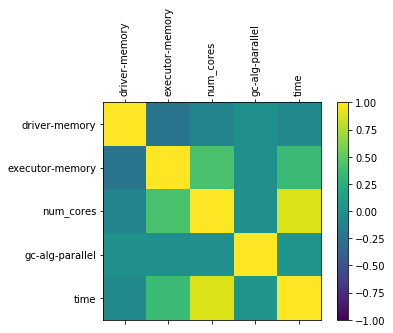

In [30]:
df = all_df.loc[all_df["q_0" + str(7)] == 1]
for i in range(1, 10):
    df = df.drop("q_0" + str(i), axis=1)
    
    
correlations = df.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_yticklabels(df.columns)
ax.set_xticklabels(df.columns)
plt.xticks(rotation=90)
plt.savefig("corr_7.jpg")
plt.show()

In [31]:
df.sort_values(by="time").head()

,driver-memory,executor-memory,num_cores,gc-alg-parallel,time
114,3,4,2,1,21.347
121,4,3,2,0,21.402
113,3,3,2,0,21.465
122,4,4,2,1,21.621
120,4,3,2,1,21.680
